In [ ]:
# Ex[1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
import os
import seaborn as sns
from scipy import stats

In [ ]:
#Ex[2]:
os.chdir

<function posix.chdir(path)>

In [ ]:
#Ex[3]:
df = pd.read_csv('/content/user_behavior_dataset (1).csv', encoding='latin1')
print(df.shape)

(700, 11)


In [ ]:
#Ex[4]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393.0,6.4,1872,67.0,1122,40.0,Male,4.0
1,2,OnePlus 9,Android,268.0,4.7,1331,42.0,944,47.0,Female,3.0
2,3,Xiaomi Mi 11,Android,154.0,4.0,761,32.0,322,42.0,Male,2.0
3,4,Google Pixel 5,Android,239.0,4.8,1676,56.0,871,20.0,Male,3.0
4,5,NaN,iOS,187.0,4.3,1367,58.0,988,31.0,Female,3.0


In [ ]:
#Ex[5]:
df.tail()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
695,696,iPhone 12,iOS,92.0,3.9,1082,26.0,381,22.0,NaN,2.0
696,697,Xiaomi Mi 11,Android,316.0,6.8,1965,68.0,1201,59.0,Male,4.0
697,698,Google Pixel 5,Android,99.0,3.1,942,22.0,457,50.0,NaN,2.0
698,699,Samsung Galaxy S21,Android,62.0,1.7,431,13.0,224,44.0,Male,1.0
699,700,OnePlus 9,Android,212.0,5.4,1306,49.0,828,23.0,Female,3.0


In [ ]:
#Ex[6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                697 non-null    object 
 2   Operating System            698 non-null    object 
 3   App Usage Time (min/day)    699 non-null    float64
 4   Screen On Time (hours/day)  699 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    697 non-null    float64
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         698 non-null    float64
 9   Gender                      697 non-null    object 
 10  User Behavior Class         699 non-null    float64
dtypes: float64(5), int64(3), object(3)
memory usage: 60.3+ KB


In [ ]:
#Ex[7]:
df.describe()
print(df.describe())


         User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  700.00000                699.000000                  699.000000   
mean   350.50000                271.207439                    5.278255   
std    202.21688                177.314078                    3.067276   
min      1.00000                 30.000000                    1.000000   
25%    175.75000                112.500000                    2.500000   
50%    350.50000                228.000000                    4.900000   
75%    525.25000                435.500000                    7.400000   
max    700.00000                598.000000                   12.000000   

       Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
count               700.000000                697.000000           700.000000   
mean               1525.158571                 50.622669           929.742857   
std                 819.136414                 26.896507           640.451729   
min      

In [ ]:
#Ex[8]:
df.dtypes

,0
User ID,int64
Device Model,object
Operating System,object
App Usage Time (min/day),float64
Screen On Time (hours/day),float64
Battery Drain (mAh/day),int64
Number of Apps Installed,float64
Data Usage (MB/day),int64
Age,float64
Gender,object


In [ ]:
#Ex[9]:( check duplicate values in each row)
df.duplicated().sum


<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Length: 700, dtype: bool>

In [ ]:
#Ex[10]:(value_counts to check uniques values in each column )
df.Gender.value_counts()


,count
Gender,
Male,363
Female,334


In [ ]:
#Ex[11]:
df['Screen On Time (hours/day)'].value_counts()

,count
Screen On Time (hours/day),
1.6,21
2.0,17
1.1,17
6.6,15
1.3,15
...,...
8.3,1
8.1,1
12.0,1


<Axes: xlabel='Gender'>

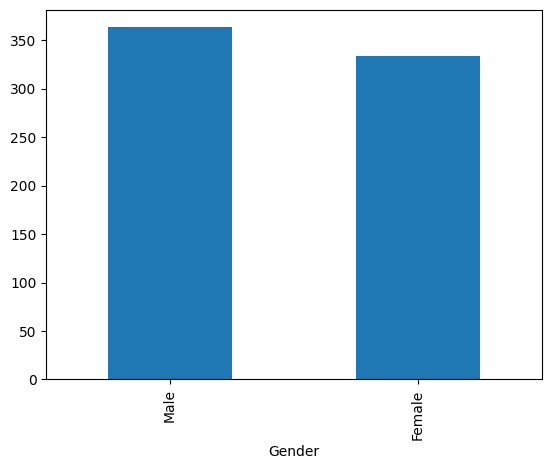

In [ ]:
#Ex[12]:
df.Gender.value_counts().plot(kind='bar')

In [ ]:
#Ex[13]:(#rename column)
df.rename(columns={'Device Model':'Device Name'},inplace='True')
df.head(3)


,User ID,Device Name,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393.0,6.4,1872,67.0,1122,40.0,Male,4.0
1,2,OnePlus 9,Android,268.0,4.7,1331,42.0,944,47.0,Female,3.0
2,3,Xiaomi Mi 11,Android,154.0,4.0,761,32.0,322,42.0,Male,2.0


In [ ]:
# # The isnull() method returns a DataFrame object where all the values are replaced with a Boolean value True for NULL values, and otherwise False
df.isnull()

,User ID,Device Name,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,True,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,True,False
698,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Ex[14]:(df.isnull().sum returns the number of missing values in the dataset.)
df.isnull().sum()

,0
User ID,0
Device Name,3
Operating System,2
App Usage Time (min/day),1
Screen On Time (hours/day),1
Battery Drain (mAh/day),0
Number of Apps Installed,3
Data Usage (MB/day),0
Age,2
Gender,3


In [ ]:
# Handle missing values

# Option 1: Drop missing values (drop rows with any missing values)
# df.dropna(inplace=True) [Dropna drops or discards all the rows with missing values in the dataset]
# By default, the dropna() method returns a new DataFrame, and will not change the original.

# If you want to change the original DataFrame, use the inplace = True argument:

# Option 2: Fill missing values with mean/median/mode
# df["Age"].fillna(df["Age"].mean(), inplace=True)
# df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [ ]:
# Ex[15]:
df['Age'].mean()

38.42836676217765

In [ ]:
#Ex[16](The groupby method in pandas is used to group data by specific columns and then apply aggregate functions, such as mean(), to each group.):
df.groupby(by='Number of Apps Installed')['Age'].mean()


,Age
Number of Apps Installed,
10.0,40.187500
11.0,37.083333
12.0,42.700000
13.0,37.214286
14.0,38.538462
...,...
95.0,31.000000
96.0,35.666667
97.0,31.666667


<Axes: xlabel='Number of Apps Installed'>

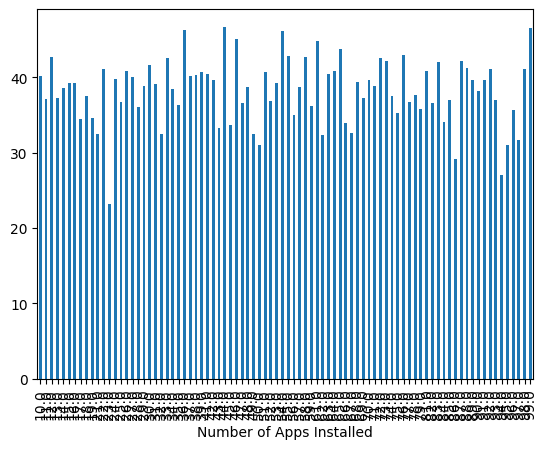

In [ ]:
#Ex[17]:
df.groupby(by='Number of Apps Installed')['Age'].mean().plot.bar()


In [ ]:
#Ex[18]:
df.isnull().sum()

,0
User ID,0
Device Name,3
Operating System,2
App Usage Time (min/day),1
Screen On Time (hours/day),1
Battery Drain (mAh/day),0
Number of Apps Installed,3
Data Usage (MB/day),0
Age,2
Gender,3


In [ ]:
df.dropna(subset=['Gender'], inplace=True)


In [ ]:
df.dropna(subset=['Device Name'], inplace=True)


In [ ]:
df.dropna(subset=['Operating System'], inplace=True)

In [ ]:
# Calculate the mean of the 'Age' column
mean_age = df['Age'].mean()

# Replace null values in the 'Age' column with the mean
df['Age'].fillna(mean_age, inplace=True)



In [ ]:
# Calculate the mean of the 'Age' column
mean_age = df['Number of Apps Installed'].mean()

# Replace null values in the 'Age' column with the mean
df['Number of Apps Installed'].fillna(mean_age, inplace=True)


In [ ]:
# Calculate the mean of the 'Age' column
mean_age = df['App Usage Time (min/day)'].mean()

# Replace null values in the 'Age' column with the mean
df['App Usage Time (min/day)'].fillna(mean_age, inplace=True)

In [ ]:
# Calculate the mean of the 'Age' column
mean_age = df['Screen On Time (hours/day)'].mean()

# Replace null values in the 'Age' column with the mean
df['Screen On Time (hours/day)'].fillna(mean_age, inplace=True)

In [ ]:
# Calculate the mean of the 'Age' column
mean_age = df['User Behavior Class'].mean()

# Replace null values in the 'Age' column with the mean
df['User Behavior Class'].fillna(mean_age, inplace=True)

In [ ]:
#Ex[19]:(no null set is present in dataset)
df.isnull().sum()

,0
User ID,0
Device Name,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [ ]:
#Ex[20]:
# converting catagorial to numeric
#Use pd.get_dummies() to convert any column to dummy variables.
#Join the resulting dummy variables back to the original DataFrame.

#Gender=pd.get_dummies(df['Gender'], drop_first=True)

In [ ]:
# To drop or delete unnecessary columns
#df.drop(['User Behavior Class'], axis=1, inplace=True)


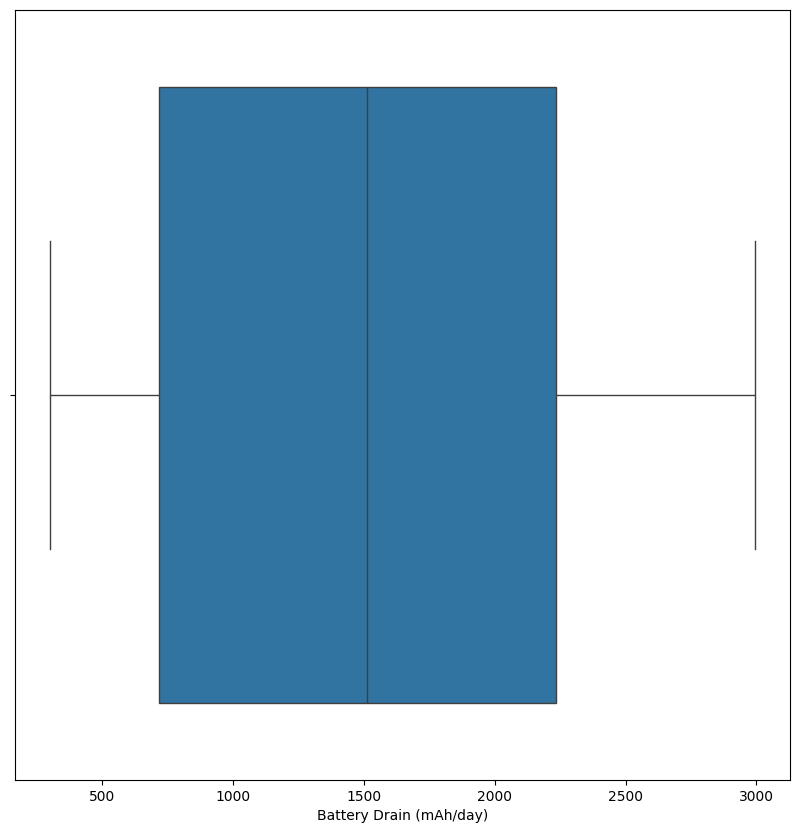

In [ ]:
#Ex[20]:
# Box plot
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['Battery Drain (mAh/day)'].dropna())  # Replace 'column' with the actual column name you want to plot
plt.show()

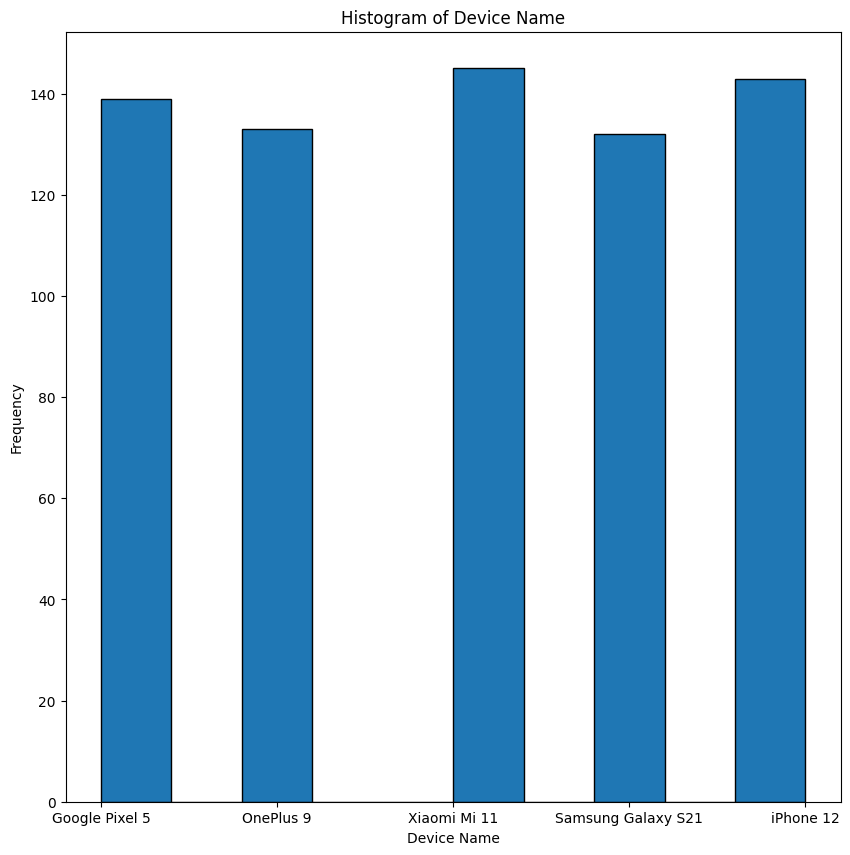

In [ ]:
#Ex[21]:
# Create a histogram
plt.figure(figsize=(10, 10))
plt.hist(df['Device Name'].dropna(), bins=10, edgecolor='black')
plt.title(f'Histogram of Device Name')
plt.xlabel('Device Name')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#Ex[22]:
# Convert the column to a numpy array, excluding NaN values
column_np = df['Age'].dropna().to_numpy()

# Calculate mean and standard deviation
mean = np.mean(column_np)
std_dev = np.std(column_np)
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

Mean: 38.459420289855075
Standard Deviation: 11.981040162036408


In [ ]:
#Ex[23]:
# Calculate Z-scores
z_scores = stats.zscore(column_np)
# Print Z-scores
print(f"Z-scores: {column_np}")


Z-scores: [40.         47.         42.         20.         31.         21.
 31.         42.         42.         34.         24.         57.
 43.         49.         39.         47.         44.         26.
 29.         45.         43.         23.         37.         38.45942029
 52.         29.         33.         55.         19.         37.
 25.         21.         58.         38.         20.         26.
 24.         40.         23.         56.         33.         43.
 18.         56.         39.         22.         27.         49.
 49.         54.         29.         27.         53.         53.
 30.         42.         26.         22.         56.         28.
 57.         55.         21.         43.         56.         55.
 28.         31.         29.         45.         37.         22.
 50.         39.         23.         54.         30.         51.
 34.         51.         41.         21.         19.         33.
 44.         39.         44.         34.         45.         40.
 32.   

In [ ]:
#Ex[24]:
# Identify outliers (using a threshold of 3)
threshold = 3
outliers = column_np[np.abs(z_scores) > threshold]

print("Outliers using Z-score method:")
print(outliers)

Outliers using Z-score method:
[]


In [ ]:
#Ex[25]:
# Z-score method to detect outliers (direct and short way)
# Column to check for outliers
column = 'Age'

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[column].dropna()))

# Set a threshold (commonly 3)
threshold = 3

# Identify outliers
outliers = df[column][(z_scores > threshold)]

print("Outliers using Z-score method:")
print(outliers)


Outliers using Z-score method:
Series([], Name: Age, dtype: float64)


In [ ]:
#Ex[26]:
# Filter out the outliers
df_cleaned_zscore = df[(np.abs(stats.zscore(df[column].dropna())) <= threshold) | df[column].isna()]

print("Dataset after removing outliers using Z-score method:")
print(df_cleaned_zscore[column])

Dataset after removing outliers using Z-score method:
0      40.0
1      47.0
2      42.0
3      20.0
5      31.0
       ... 
693    31.0
694    34.0
696    59.0
698    44.0
699    23.0
Name: Age, Length: 692, dtype: float64


In [ ]:
#Ex[27]:
# Detect outliers using IQR method


# Column to check for outliers
column = 'Age'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Print Q1, Q3, and IQR values
print(f"Q1 (25th percentile) of {column}: {Q1}")
print(f"Q3 (75th percentile) of {column}: {Q3}")
print(f"IQR (Interquartile Range) of {column}: {IQR}")


# Identify outliers
outliers_iqr = df[column][((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

print("Outliers using IQR method:")
print(outliers_iqr)


Q1 (25th percentile) of Age: 28.0
Q3 (75th percentile) of Age: 49.0
IQR (Interquartile Range) of Age: 21.0
Outliers using IQR method:
Series([], Name: Age, dtype: float64)


In [ ]:
#Ex[28]:
# Filter out the outliers

df_cleaned_iqr = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))) | df[column].isna()]

print("Dataset after removing outliers using IQR method:")
print(df_cleaned_iqr[column])

Dataset after removing outliers using IQR method:
0      40.0
1      47.0
2      42.0
3      20.0
5      31.0
       ... 
693    31.0
694    34.0
696    59.0
698    44.0
699    23.0
Name: Age, Length: 692, dtype: float64


In [ ]:
# THE END!